#### The script contains:

#### 1. Importing Libraries & Data

#### 2. Cleaning, manipulations, and reprocessing

#### 3. Elbow technique

#### 4. Deciding the number of clusters for k-means algorithm

#### 5. Run the K-means algorithm & attach the result to the dataframe

#### 6. Visualisation of the clustered data

#### 7. Calculate the descriptive statistics for your clusters using the groupby() function

#### 1. Importing Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Import Data

path = r'/Users/queency_yustiawan/Study/CF/data analyst course/immersion/A6 exercise/Gun Violence Analysis'

df = pd.read_csv (os.path.join(path,'02. Data', 'Prepared Data', 'gun_violence_data_wrangled.csv'), index_col = False)
df.head()

,Unnamed: 0,incident_id,date,day_of_week,day,month,year,state,city_or_county,address,...,n_guns_involved,n_killed,n_injured,n_adult,n_teen,n_child,n_male,n_female,n_victim,n_suspect
0,0,461105,2013-01-01,Tuesday,1,1,2013,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,...,NaN,0,4,5,0,0,3,1,4,1
1,1,460726,2013-01-01,Tuesday,1,1,2013,California,Hawthorne,13500 block of Cerise Avenue,...,NaN,1,3,4,0,0,1,0,4,1
2,2,478855,2013-01-01,Tuesday,1,1,2013,Ohio,Lorain,1776 East 28th Street,...,2.0,1,3,5,0,0,5,0,3,2
3,3,478925,2013-01-05,Saturday,5,1,2013,Colorado,Aurora,16000 block of East Ithaca Place,...,NaN,4,0,4,0,0,3,1,3,1
4,4,478959,2013-01-07,Monday,7,1,2013,North Carolina,Greensboro,307 Mourning Dove Terrace,...,2.0,2,2,3,1,0,2,2,3,1


In [4]:
# Drop Unnamed: 0 column
df = df.drop(columns=['Unnamed: 0'])
df.head()

,incident_id,date,day_of_week,day,month,year,state,city_or_county,address,latitude,...,n_guns_involved,n_killed,n_injured,n_adult,n_teen,n_child,n_male,n_female,n_victim,n_suspect
0,461105,2013-01-01,Tuesday,1,1,2013,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,40.3467,...,NaN,0,4,5,0,0,3,1,4,1
1,460726,2013-01-01,Tuesday,1,1,2013,California,Hawthorne,13500 block of Cerise Avenue,33.9090,...,NaN,1,3,4,0,0,1,0,4,1
2,478855,2013-01-01,Tuesday,1,1,2013,Ohio,Lorain,1776 East 28th Street,41.4455,...,2.0,1,3,5,0,0,5,0,3,2
3,478925,2013-01-05,Saturday,5,1,2013,Colorado,Aurora,16000 block of East Ithaca Place,39.6518,...,NaN,4,0,4,0,0,3,1,3,1
4,478959,2013-01-07,Monday,7,1,2013,North Carolina,Greensboro,307 Mourning Dove Terrace,36.1140,...,2.0,2,2,3,1,0,2,2,3,1


#### 2. Cleaning, manipulations, and reprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   incident_id      239677 non-null  int64  
 1   date             239677 non-null  object 
 2   day_of_week      239677 non-null  object 
 3   day              239677 non-null  int64  
 4   month            239677 non-null  int64  
 5   year             239677 non-null  int64  
 6   state            239677 non-null  object 
 7   city_or_county   239677 non-null  object 
 8   address          223180 non-null  object 
 9   latitude         231754 non-null  float64
 10  longitude        231754 non-null  float64
 11  incident_event   239677 non-null  object 
 12  incident_shot    239677 non-null  object 
 13  n_guns_involved  140226 non-null  float64
 14  n_killed         239677 non-null  int64  
 15  n_injured        239677 non-null  int64  
 16  n_adult          239677 non-null  int6

In [6]:
# Delete all non numeric columns

df_2 = df.drop(columns = ['date', 'day_of_week', 'state', 'city_or_county', 'address', 'latitude', 'longitude', 'incident_event', 'incident_shot'])

In [7]:
df_2.head()

,incident_id,day,month,year,n_guns_involved,n_killed,n_injured,n_adult,n_teen,n_child,n_male,n_female,n_victim,n_suspect
0,461105,1,1,2013,NaN,0,4,5,0,0,3,1,4,1
1,460726,1,1,2013,NaN,1,3,4,0,0,1,0,4,1
2,478855,1,1,2013,2.0,1,3,5,0,0,5,0,3,2
3,478925,5,1,2013,NaN,4,0,4,0,0,3,1,3,1
4,478959,7,1,2013,2.0,2,2,3,1,0,2,2,3,1


In [8]:
# changing cloumns type

df_2['n_guns_involved'] = df_2['n_guns_involved'].fillna(0).astype(int)

In [9]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   incident_id      239677 non-null  int64
 1   day              239677 non-null  int64
 2   month            239677 non-null  int64
 3   year             239677 non-null  int64
 4   n_guns_involved  239677 non-null  int64
 5   n_killed         239677 non-null  int64
 6   n_injured        239677 non-null  int64
 7   n_adult          239677 non-null  int64
 8   n_teen           239677 non-null  int64
 9   n_child          239677 non-null  int64
 10  n_male           239677 non-null  int64
 11  n_female         239677 non-null  int64
 12  n_victim         239677 non-null  int64
 13  n_suspect        239677 non-null  int64
dtypes: int64(14)
memory usage: 25.6 MB


In [31]:
df_2.describe()

,incident_id,day,month,year,n_guns_involved,n_killed,n_injured,n_adult,n_teen,n_child,n_male,n_female,n_victim,n_suspect,clusters
count,2.396770e+05,239677.000000,239677.000000,239677.000000,239677.000000,239677.000000,239677.000000,239677.000000,239677.000000,239677.000000,239677.000000,239677.000000,239677.000000,239677.000000,239677.000000
mean,5.593343e+05,15.773787,6.351786,2015.711629,0.802964,0.252290,0.494007,1.278533,0.106873,0.019059,1.289615,0.180126,0.805501,0.831381,0.987396
std,2.931287e+05,8.831929,3.447656,1.225870,3.641656,0.521779,0.729952,1.147596,0.416672,0.169709,1.067821,0.458493,0.839808,0.974121,0.818897
min,9.211400e+04,1.000000,1.000000,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.085450e+05,8.000000,3.000000,2015.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,5.435870e+05,16.000000,6.000000,2016.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,8.172280e+05,23.000000,9.000000,2017.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,2.000000
max,1.083472e+06,31.000000,12.000000,2018.000000,400.000000,50.000000,53.000000,103.000000,27.000000,11.000000,61.000000,23.000000,102.000000,63.000000,2.000000


/Users/queency_yustiawan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='n_guns_involved', ylabel='Count'>

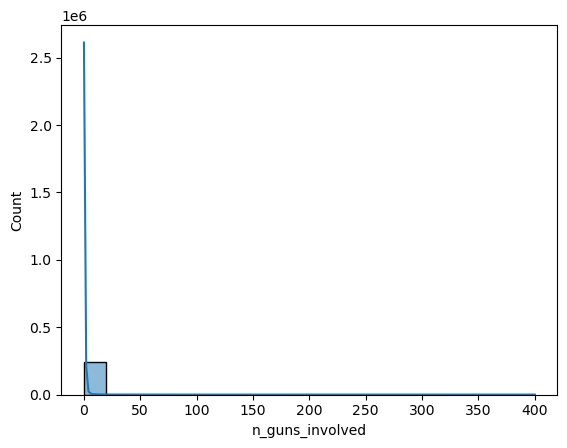

In [32]:
# Extreme value checks

sns.histplot(df_2['n_guns_involved'], bins=20, kde = True)

In [34]:
# Clean extreme values

df_2 = df_2[df_2['n_guns_involved'] < 150] 

#### 3. Elbow technique

In [35]:
# Define range potential clusters in data and k-means clusters based on the range

num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [36]:
# Creates a score that represent the rate of variation based on the cluster option

score = [kmeans[i].fit(df_2).score(df_2) for i in range(len(kmeans))] 

score

/Users/queency_yustiawan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/queency_yustiawan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/queency_yustiawan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/queency_yustiawan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: 

[-2.0593386460001064e+16,
 -5015519215568018.0,
 -2239113888562556.5,
 -1236976269084184.0,
 -759949148936693.5,
 -507645540272560.1,
 -373544397399870.75,
 -288907269839768.5,
 -233398326556011.44]

#### 4. Deciding the number of clusters for k-means algorithm

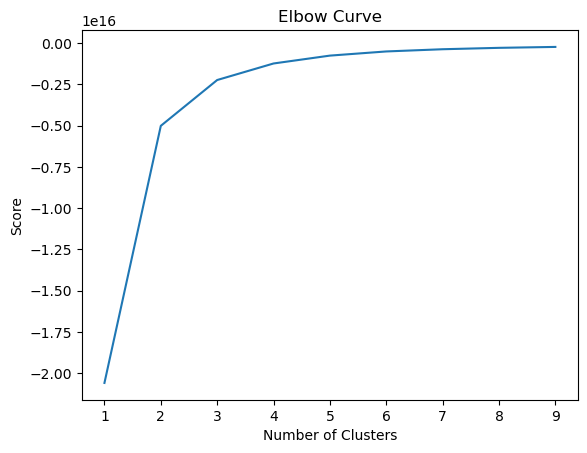

In [37]:
# Plotting the elbow curve using PyLab

elbow_curve = pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

##### The curve begins to flatten out after cluster 4. Thus, the optimal count for the cluster will be 4.

#### 5. Run the K-means algorithm  & attach the result to the dataframe

In [38]:
# Create the k-means object

kmeans = KMeans(n_clusters = 4) 

In [39]:
# Fit the k-means object to the data.

kmeans.fit(df_2)

/Users/queency_yustiawan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [40]:
df_2['clusters'] = kmeans.fit_predict(df_2)

/Users/queency_yustiawan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/8k/dxgtncgd49g2ryx410bsc12r0000gn/T/ipykernel_16633/1948498210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['clusters'] = kmeans.fit_predict(df_2)


In [41]:
df_2.head()

,incident_id,day,month,year,n_guns_involved,n_killed,n_injured,n_adult,n_teen,n_child,n_male,n_female,n_victim,n_suspect,clusters
0,461105,1,1,2013,0,0,4,5,0,0,3,1,4,1,2
1,460726,1,1,2013,0,1,3,4,0,0,1,0,4,1,2
2,478855,1,1,2013,2,1,3,5,0,0,5,0,3,2,2
3,478925,5,1,2013,0,4,0,4,0,0,3,1,3,1,2
4,478959,7,1,2013,2,2,2,3,1,0,2,2,3,1,2


In [42]:
df_2['clusters'].value_counts()

clusters
2    64018
0    60218
3    59249
1    56167
Name: count, dtype: int64

#### 6. Visualisation of the clustered data

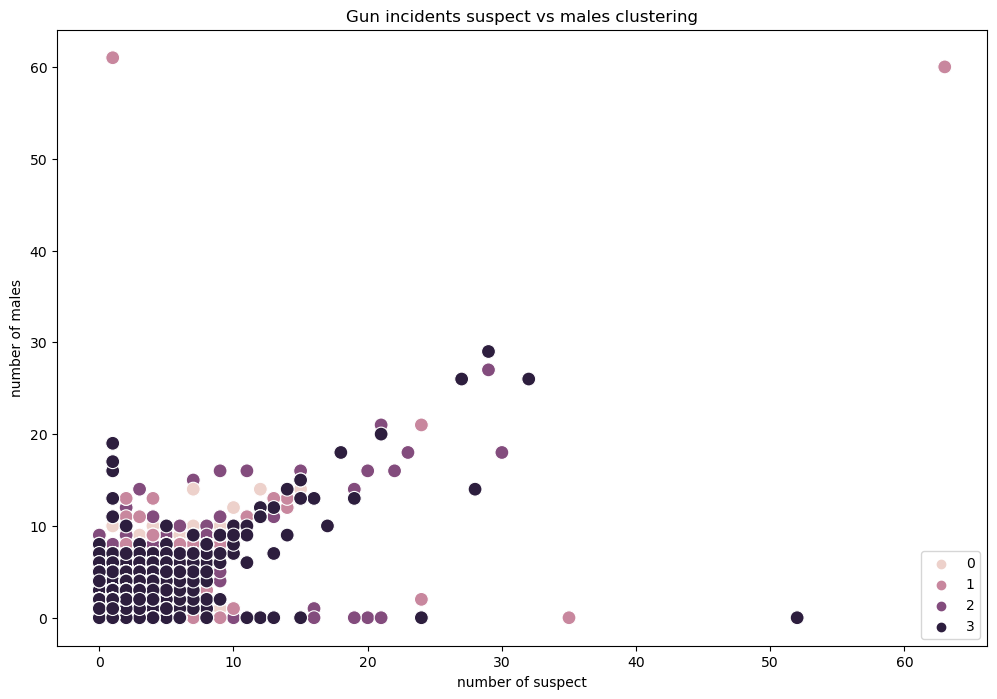

In [43]:
# Plot the clusters for the "n_suspect" and "n_male" variables.

plt.figure(figsize=(12,8))
cluster_1 = sns.scatterplot(x=df_2['n_suspect'], y=df_2['n_male'], hue=kmeans.labels_, s=100) 

cluster_1.grid(False)
plt.title('Gun incidents suspect vs males clustering')
plt.xlabel('number of suspect') # Label x-axis.
plt.ylabel('number of males') # Label y-axis.
plt.show()

In [48]:
#saving visualisations

cluster_1.figure.savefig(os.path.join(path, '04. Analysis', 'cluster_1.png'), bbox_inches='tight')


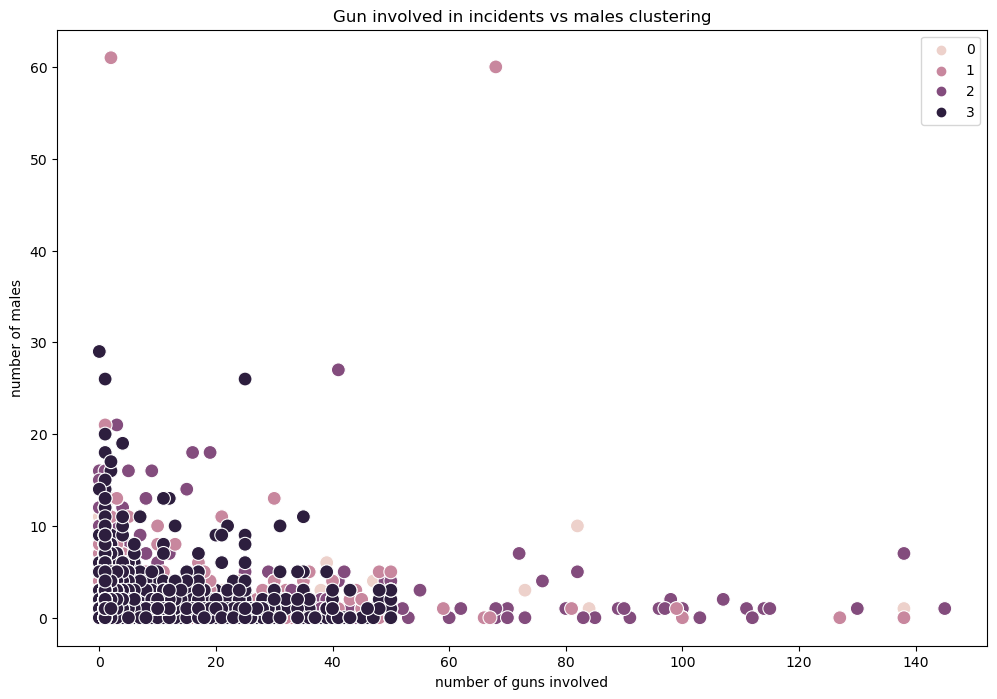

In [59]:
# Plot the clusters for the "n_male" and "n_guns_involved" variables.

plt.figure(figsize=(12,8))
cluster_2 = sns.scatterplot(x=df_2['n_guns_involved'], y=df_2['n_male'], hue=kmeans.labels_, s=100) 

cluster_1.grid(False)
plt.title('Gun involved in incidents vs males clustering')
plt.xlabel('number of guns involved') # Label x-axis.
plt.ylabel('number of males') # Label y-axis.
plt.show()

In [60]:
#saving visualisations

cluster_2.figure.savefig(os.path.join(path, '04. Analysis', 'cluster_2.png'), bbox_inches='tight')


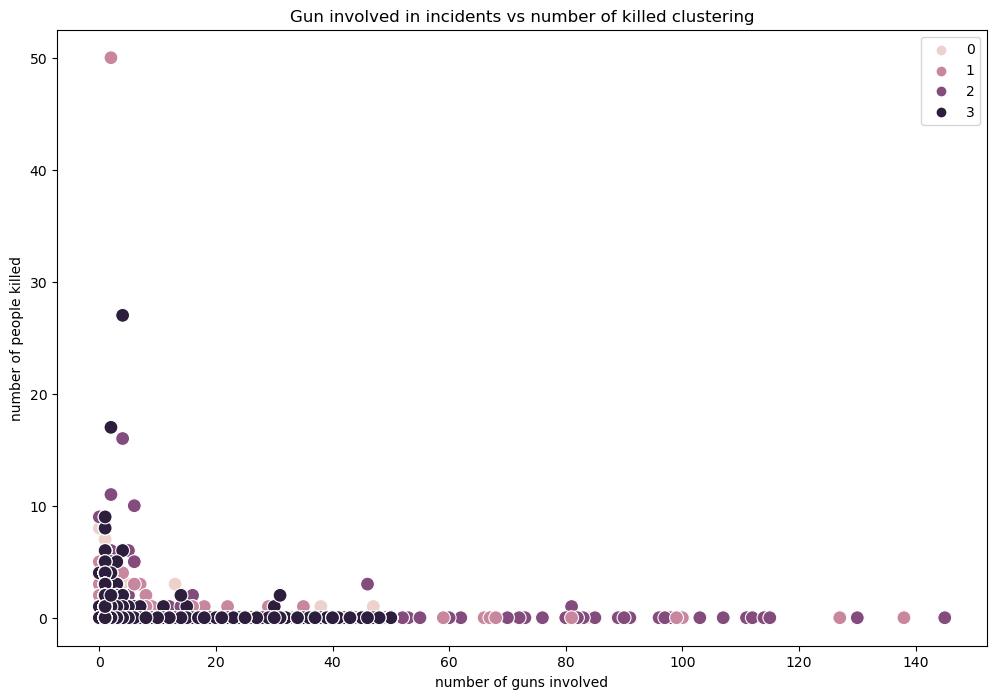

In [61]:
# Plot the clusters for the "n_killed" and "n_guns_involved" variables.

plt.figure(figsize=(12,8))
cluster_3 = sns.scatterplot(x=df_2['n_guns_involved'], y=df_2['n_killed'], hue=kmeans.labels_, s=100) 

cluster_1.grid(False)
plt.title('Gun involved in incidents vs number of killed clustering')
plt.xlabel('number of guns involved') # Label x-axis.
plt.ylabel('number of people killed') # Label y-axis.
plt.show()

In [62]:
#saving visualisations

cluster_3.figure.savefig(os.path.join(path, '04. Analysis', 'cluster_2.png'), bbox_inches='tight')


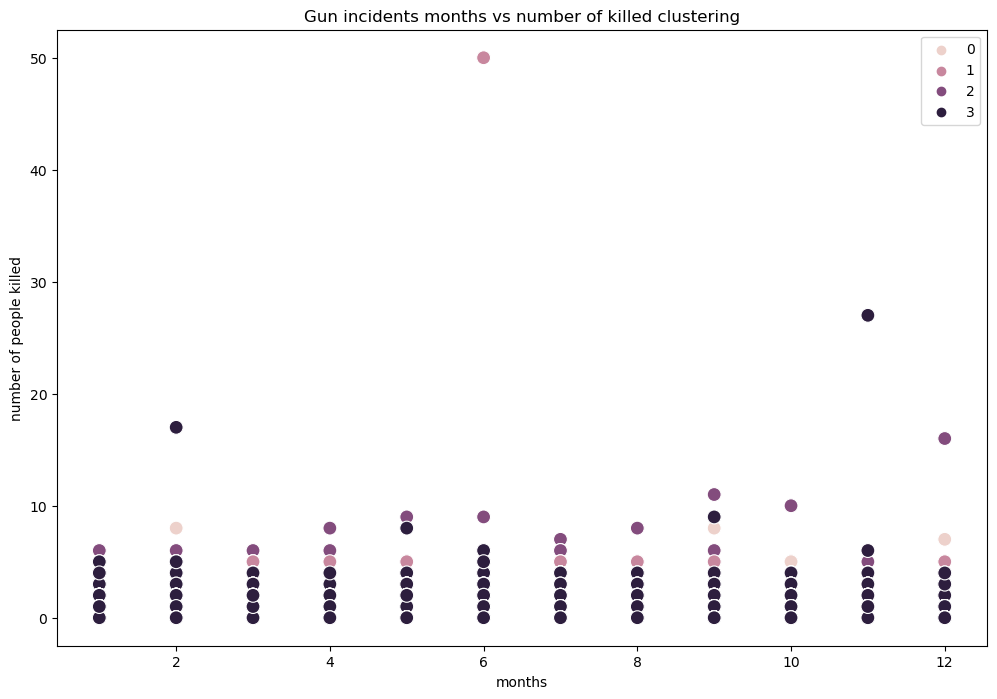

In [63]:
# Plot the clusters for the "n_killed" and "month" variables.

plt.figure(figsize=(12,8))
cluster_4 = sns.scatterplot(x=df_2['month'], y=df_2['n_killed'], hue=kmeans.labels_, s=100) 

cluster_1.grid(False)
plt.title('Gun incidents months vs number of killed clustering')
plt.xlabel('months') # Label x-axis.
plt.ylabel('number of people killed') # Label y-axis.
plt.show()

In [64]:
#saving visualisations

cluster_4.figure.savefig(os.path.join(path, '04. Analysis', 'cluster_2.png'), bbox_inches='tight')


#### 7. Calculate the descriptive statistics for your clusters using the groupby() function

In [65]:
df_2.loc[df_2['clusters'] == 3, 'cluster'] = 'dark purple'
df_2.loc[df_2['clusters'] == 2, 'cluster'] = 'purple'
df_2.loc[df_2['clusters'] == 1, 'cluster'] = 'pink'
df_2.loc[df_2['clusters'] == 0, 'cluster'] = 'light pink'

In [66]:
df_2.groupby('cluster').agg({'n_guns_involved':['mean', 'median'], 
                                      'n_male':['mean', 'median'],
                                      'n_suspect':['mean', 'median'],
                                      'n_killed':['mean', 'median'],
                                      'month':['mean', 'median']})

n_guns_involved           n_male        n_suspect         \
                       mean median      mean median      mean median   
cluster                                                                
dark purple        1.247903    1.0  1.220510    1.0  0.825786    1.0   
light pink         0.201252    0.0  1.367315    1.0  0.868910    1.0   
pink               1.100807    1.0  1.258301    1.0  0.809942    1.0   
purple             0.588022    0.0  1.308320    1.0  0.820222    1.0   

             n_killed            month         
                 mean median      mean median  
cluster                                        
dark purple  0.252865    0.0  6.593276    7.0  
light pink   0.248016    0.0  5.951078    6.0  
pink         0.256467    0.0  6.717521    7.0  
purple       0.252210    0.0  6.183917    6.0

##### The dark purple cluster have an average higher number of most guns involved compared to other clusters. however over all they are all quite similar, with light pink and purple cluster exhibits slightly larger differences, indicating it has more variability within those clusters for some indicators.

##### The clustering results can be used for:

##### To develop policies and allocate resources based on cluster characteristics, focusing on areas with higher incident rates.
##### To assess the risk of future incidents or develope suspect profiles based on the characteristics of each cluster.
##### To design specialised training programs for law enforcement based on the typical scenarios identified in each cluster.

In [68]:
# Export the dataframes to csv file

df.to_csv(os.path.join(path, '02. Data', 'Prepared Data','gun_violence__data_ex5.csv'))
df_2.to_csv(os.path.join(path, '02. Data', 'Prepared Data','gun_violence_data_clustering.csv'))